Modelo anal√≠tico del chubasco electromagn√©tico - Bethe-Heitler

    Generaci√≥n  N_part√≠culas  Energ√≠a_por_part√≠cula (MeV)
0            0             1                  1000.000000
1            1             2                   500.000000
2            2             4                   250.000000
3            3             8                   125.000000
4            4            16                    62.500000
5            5            32                    31.250000
6            6            64                    15.625000
7            7           128                     7.812500
8            8           256                     3.906250
9            9           512                     1.953125
10          10             0                          NaN

t_max continuo ‚âà 9.966
t_max entero   = 9
N m√°ximo te√≥rico ‚âà 1000.0


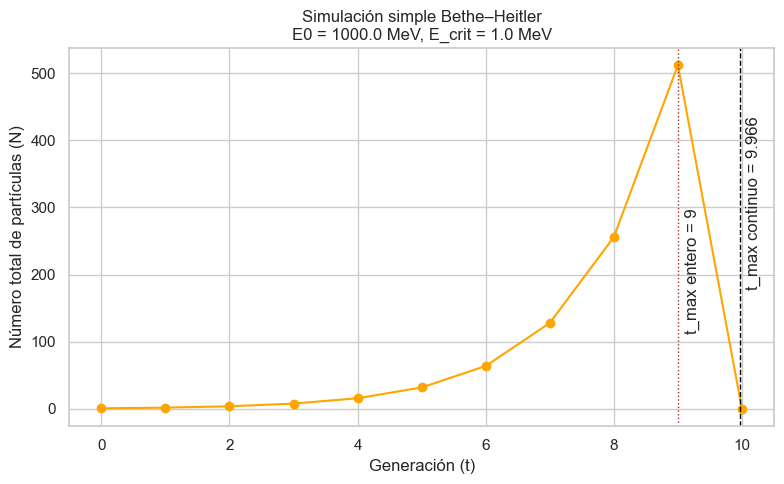

In [74]:
import math
import matplotlib.pyplot as plt
import pandas as pd

# Par√°metros
E0_MeV = 1000.0       # Energ√≠a inicial (MeV)
E_crit_MeV = 1.0      # Umbral (MeV)
max_generations = 10  # N√∫mero m√°ximo de generaciones

# Simulaci√≥n
generations = []
particles = [E0_MeV]  # lista de energ√≠as de part√≠culas

for gen in range(max_generations + 1):
    # Guardar info de la generaci√≥n actual
    generations.append({
        "Generaci√≥n": gen,
        "N_part√≠culas": len(particles),
        "Energ√≠a_por_part√≠cula (MeV)": particles[0] if len(particles) > 0 else None
    })
    
    # Crear la siguiente generaci√≥n
    new_particles = []
    for e in particles:
        child_energy = e / 2.0
        if child_energy >= E_crit_MeV:
            new_particles.append(child_energy)
            new_particles.append(child_energy)
    particles = new_particles

# Convertir a DataFrame
df = pd.DataFrame(generations)
df["Energ√≠a_por_part√≠cula (MeV)"] = df["Energ√≠a_por_part√≠cula (MeV)"].round(6)
print(df)

# C√°lculo del t_max te√≥rico
t_max_continuo = math.log(E0_MeV/E_crit_MeV) / math.log(2)
t_max_entero = math.floor(t_max_continuo)
N_teorico = E0_MeV / E_crit_MeV
print(f"\nt_max continuo ‚âà {t_max_continuo:.3f}")
print(f"t_max entero   = {t_max_entero}")
print(f"N m√°ximo te√≥rico ‚âà {N_teorico}")

# Gr√°fica
plt.figure(figsize=(8,5))
plt.plot(df["Generaci√≥n"], df["N_part√≠culas"], marker='o', color="orange")
plt.xlabel("Generaci√≥n (t)")
plt.ylabel("N√∫mero total de part√≠culas (N)")
plt.title("Simulaci√≥n simple Bethe‚ÄìHeitler\n"
          f"E0 = {E0_MeV} MeV, E_crit = {E_crit_MeV} MeV")

# L√≠neas que muestran los t_max
plt.axvline(t_max_continuo, linestyle='--', linewidth=1, color="black")
plt.text(t_max_continuo+0.1, max(df["N_part√≠culas"])*0.6, 
         f"t_max continuo = {t_max_continuo:.3f}", rotation=90, va='center')
plt.axvline(t_max_entero, linestyle=':', linewidth=1, color="brown")
plt.text(t_max_entero+0.1, max(df["N_part√≠culas"])*0.4, 
         f"t_max entero = {t_max_entero}", rotation=90, va='center')

plt.grid(True)
plt.tight_layout()
plt.show()


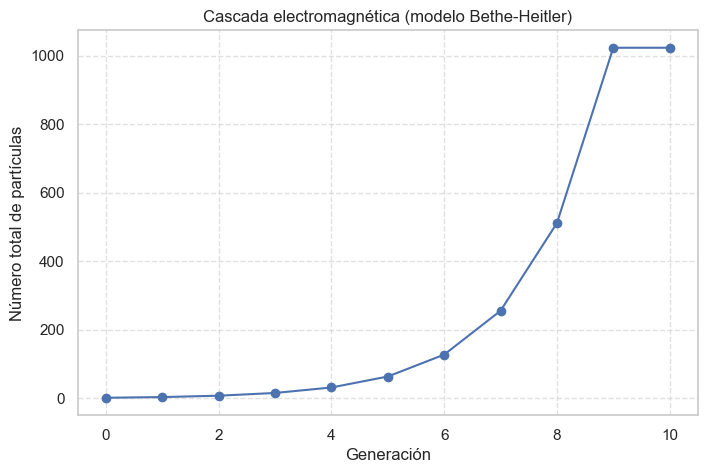

In [75]:
import matplotlib.pyplot as plt

# Par√°metros de simulaci√≥n
E0 = 1000.0  # Energ√≠a inicial del fot√≥n (MeV)
Emin = 1.0   # Umbral m√≠nimo de energ√≠a (MeV)
max_gen = 10 # N√∫mero m√°ximo de generaciones

# Inicializaci√≥n
generaciones = [0] * (max_gen + 1)  # n√∫mero de part√≠culas por generaci√≥n
particulas = [(E0, 0)]  # lista de tuplas (energ√≠a, generaci√≥n)

# Simulaci√≥n
while particulas:
    E, g = particulas.pop(0)
    if g >= max_gen:
        continue
    if E < Emin:
        continue
    
    # La part√≠cula se divide en dos con la mitad de la energ√≠a
    E_hija = E / 2
    particulas.append((E_hija, g + 1))
    particulas.append((E_hija, g + 1))
    
    # Contar
    generaciones[g] += 1

# Calcular n√∫mero acumulado de part√≠culas hasta cada generaci√≥n
acumulado = []
total = 0
for g in generaciones:
    total += g
    acumulado.append(total)

# Gr√°fica
plt.figure(figsize=(8,5))
plt.plot(range(max_gen+1), acumulado, marker="o", linestyle="-", color="b")
plt.title("Cascada electromagn√©tica (modelo Bethe-Heitler)")
plt.xlabel("Generaci√≥n")
plt.ylabel("N√∫mero total de part√≠culas")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Simulaci√≥n completada. Datos exportados y gr√°fico generado.


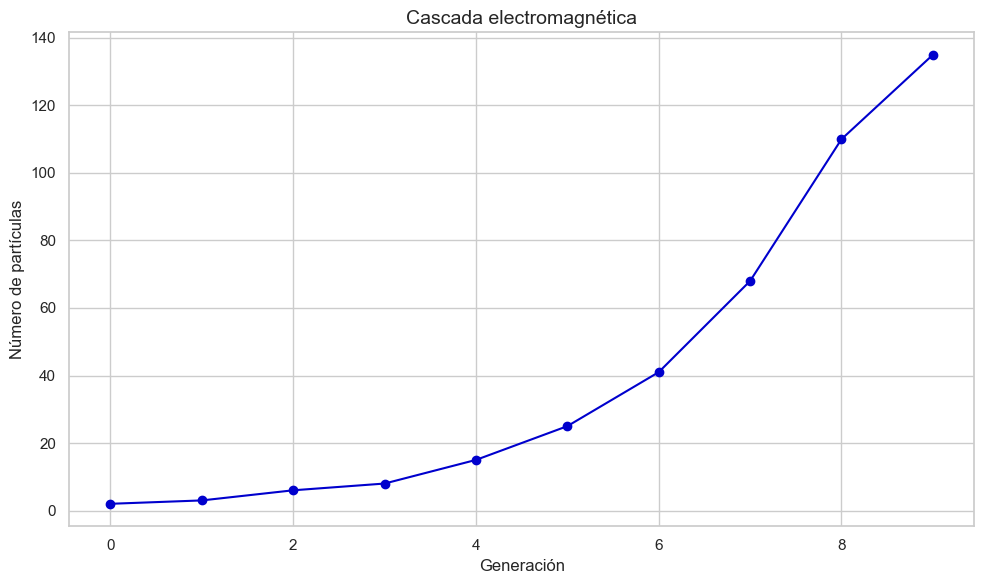

In [76]:
import random
import math
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Constantes
ELECTRON_MASS = 0.511  # MeV
MAX_GENERATIONS = 10
ANNIHILATION_PROB = 0.3

# Estilo de gr√°ficos
sns.set(style="whitegrid")

# Clase de part√≠cula
class Particle:
    def __init__(self, type, energy):
        self.type = type
        self.energy = energy

    def __repr__(self):
        return f"{self.type.capitalize()}({self.energy:.2f} MeV)"
# Divisi√≥n aleatoria de energ√≠a
def random_split(energy):
    frac = random.uniform(0.3, 0.7)
    return (energy * frac, energy * (1 - frac))

# Simulaci√≥n de la cascada
def simulate_shower(initial_energy, threshold):
    generation = 0
    particles = [Particle('gamma', initial_energy)]
    all_data = [ ]
    generation_counts = [ ]
    while particles and generation < MAX_GENERATIONS:
        new_particles = [ ]
        for p in particles:
            if p.energy < threshold:
                continue
            if p.type == 'gamma' and p.energy > 2 * ELECTRON_MASS:
                e_energy = random_split(p.energy)
                new_particles.append(Particle('electron', e_energy[0]))
                new_particles.append(Particle('positron', e_energy[1]))
            elif p.type == 'electron' and p.energy > threshold:
                gamma_energy = random_split(p.energy)[1]
                new_particles.append(Particle('gamma', gamma_energy))
                new_particles.append(Particle('electron', p.energy - gamma_energy))
            elif p.type == 'positron':
                if random.random() < ANNIHILATION_PROB:
                   new_particles.append(Particle('gamma', p.energy))
        generation_data = [(generation, p.type, p.energy) for p in new_particles]
        all_data.extend(generation_data)
        generation_counts.append(len(new_particles))
        particles = new_particles
        generation += 1
    return all_data, generation_counts

# Par√°metros de simulaci√≥n
initial_energy = 1000  # MeV
threshold = 1.0  # MeV

# Ejecutar simulaci√≥n
data, counts = simulate_shower(initial_energy, threshold)

# Exportar datos a CSV
output_csv_path = "/mnt/data/shower_data.csv"
os.makedirs(os.path.dirname(output_csv_path), exist_ok=True)
with open(output_csv_path, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Generacion", "Tipo", "Energia (MeV)"])
    writer.writerows(data)

# Visualizaci√≥n del n√∫mero de part√≠culas por generaci√≥n
plt.figure(figsize=(10, 6))
plt.plot(range(len(counts)), counts, marker='o', linestyle='-', color='mediumblue')
plt.xlabel("Generaci√≥n", fontsize=12)
plt.ylabel("N√∫mero de part√≠culas", fontsize=12)
plt.title("Cascada electromagn√©tica", fontsize=14)
plt.grid(True)
plt.tight_layout()

# Guardar gr√°fico
plot_path = "/mnt/data/shower_plot.png"
plt.savefig(plot_path)
#plt.close()

print("Simulaci√≥n completada. Datos exportados y gr√°fico generado.")




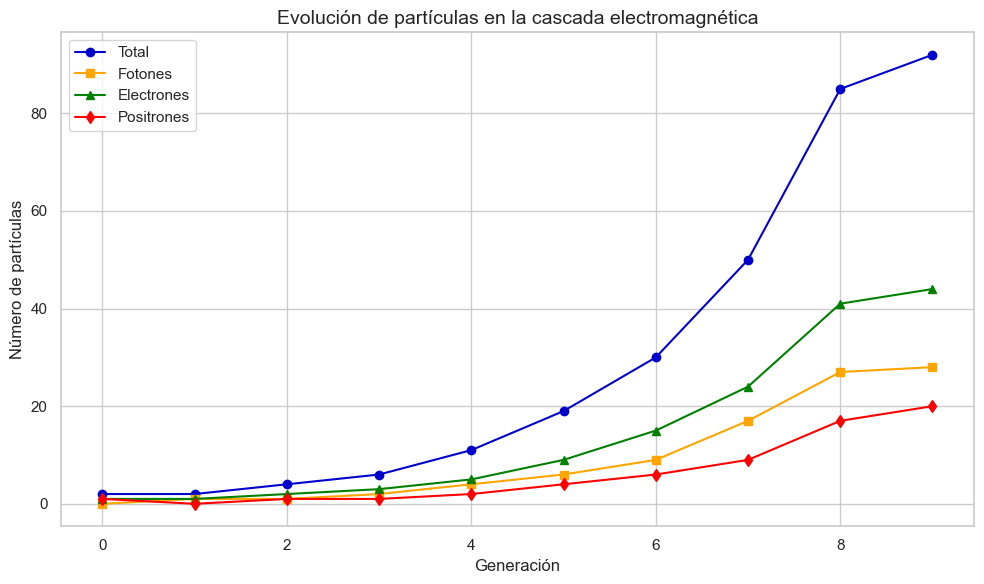

‚úÖ Simulaci√≥n completada. CSV exportado y gr√°fico combinado generado.


In [ ]:
import random
import math
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns

# ==== Constantes ====
ELECTRON_MASS = 0.511  # MeV
MAX_GENERATIONS = 10
ANNIHILATION_PROB = 0.3

sns.set(style="whitegrid")

# ==== Clase de part√≠cula ====
class Particle:
    def __init__(self, type, energy):
        self.type = type
        self.energy = energy

# ==== Divisi√≥n aleatoria de energ√≠a ====
def random_split(energy):
    frac = random.uniform(0.3, 0.7)
    return (energy * frac, energy * (1 - frac))

# ==== Simulaci√≥n de la cascada ====
def simulate_shower(initial_energy, threshold):
    generation = 0
    particles = [Particle('gamma', initial_energy)]

    all_data = []
    counts_total = []
    counts_gamma = []
    counts_electron = []
    counts_positron = []

    while particles and generation < MAX_GENERATIONS:
        new_particles = []
        for p in particles:
            if p.energy < threshold:
                continue
            if p.type == 'gamma' and p.energy > 2 * ELECTRON_MASS:
                e_energy = random_split(p.energy)
                new_particles.append(Particle('electron', e_energy[0]))
                new_particles.append(Particle('positron', e_energy[1]))
            elif p.type == 'electron':
                gamma_energy = random_split(p.energy)[1]
                new_particles.append(Particle('gamma', gamma_energy))
                new_particles.append(Particle('electron', p.energy - gamma_energy))
            elif p.type == 'positron':
                if random.random() < ANNIHILATION_PROB:
                    new_particles.append(Particle('gamma', p.energy))

        generation_data = [(generation, p.type, p.energy) for p in new_particles]
        all_data.extend(generation_data)

        counts_total.append(len(new_particles))
        counts_gamma.append(sum(1 for p in new_particles if p.type == 'gamma'))
        counts_electron.append(sum(1 for p in new_particles if p.type == 'electron'))
        counts_positron.append(sum(1 for p in new_particles if p.type == 'positron'))

        particles = new_particles
        generation += 1

    return all_data, counts_total, counts_gamma, counts_electron, counts_positron

# ==== Par√°metros ====
initial_energy = 1000  # MeV
threshold = 1.0  # MeV

# ==== Ejecutar simulaci√≥n ====
data, counts_total, counts_gamma, counts_electron, counts_positron = simulate_shower(initial_energy, threshold)

# ==== CSV ====
output_csv_path = "shower_data03.csv"
with open(output_csv_path, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Generacion", "Tipo", "Energia (MeV)"])
    writer.writerows(data)

# ==== Graficar todas juntas ====
gens = range(len(counts_total))

plt.figure(figsize=(10, 6))
plt.plot(gens, counts_total, marker='o', linestyle='-', color='mediumblue', label="Total")
plt.plot(gens, counts_gamma, marker='s', linestyle='-', color='orange', label="Fotones")
plt.plot(gens, counts_electron, marker='^', linestyle='-', color='green', label="Electrones")
plt.plot(gens, counts_positron, marker='d', linestyle='-', color='red', label="Positrones")

plt.xlabel("Generaci√≥n", fontsize=12)
plt.ylabel("N√∫mero de part√≠culas", fontsize=12)
plt.title("Evoluci√≥n de part√≠culas en la cascada electromagn√©tica con probabilidad de 0.3", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("‚úÖ Simulaci√≥n completada. CSV exportado y gr√°fico combinado generado.")


Se observa que a medida que avanza la cascada, los electrones dominan en n√∫mero, aunque los fotones se mantienen cercanos.

Los positrones aparecen en menor cantidad y con un retraso, debido a que requieren pares 
ùõæ‚Üíùëí‚àíùëí+Œ≥‚Üíe‚àíe+.

Esto concuerda con la f√≠sica:

Los fotones iniciales producen pares electr√≥n-positr√≥n.

Los electrones y positrones generan radiaci√≥n de frenado (bremsstrahlung), que produce m√°s fotones.

Los positrones eventualmente se aniquilan, lo que limita su n√∫mero

El modelo Bethe‚ÄìHeitler captura la tendencia general (crecimiento de part√≠culas hasta alcanzar un m√°ximo cuando la energ√≠a por part√≠cula cae bajo el umbral).

La simulaci√≥n Monte Carlo muestra un comportamiento m√°s rico y realista, con mayor n√∫mero de part√≠culas y diferenciaci√≥n entre especies, reflejando la naturaleza probabil√≠stica de las interacciones electromagn√©ticas.

La comparaci√≥n muestra c√≥mo el modelo simple es √∫til para estimar la escala del fen√≥meno, mientras que la simulaci√≥n Monte Carlo es esencial para describir la cascada en detalle.

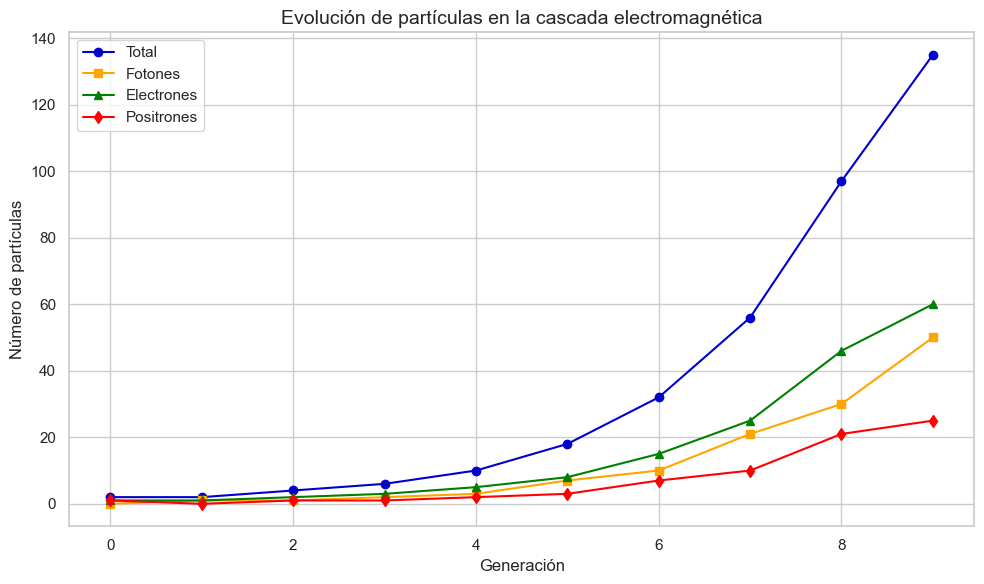

‚úÖ Simulaci√≥n completada. CSV exportado y gr√°fico combinado generado.


In [ ]:

# ==== Constantes ====
ELECTRON_MASS = 0.511  # MeV
MAX_GENERATIONS = 10
ANNIHILATION_PROB = 0.8

sns.set(style="whitegrid")

# ==== Clase de part√≠cula ====
class Particle:
    def __init__(self, type, energy):
        self.type = type
        self.energy = energy

# ==== Divisi√≥n aleatoria de energ√≠a ====
def random_split(energy):
    frac = random.uniform(0.3, 0.7)
    return (energy * frac, energy * (1 - frac))

# ==== Simulaci√≥n de la cascada ====
def simulate_shower(initial_energy, threshold):
    generation = 0
    particles = [Particle('gamma', initial_energy)]

    all_data = []
    counts_total = []
    counts_gamma = []
    counts_electron = []
    counts_positron = []

    while particles and generation < MAX_GENERATIONS:
        new_particles = []
        for p in particles:
            if p.energy < threshold:
                continue
            if p.type == 'gamma' and p.energy > 2 * ELECTRON_MASS:
                e_energy = random_split(p.energy)
                new_particles.append(Particle('electron', e_energy[0]))
                new_particles.append(Particle('positron', e_energy[1]))
            elif p.type == 'electron':
                gamma_energy = random_split(p.energy)[1]
                new_particles.append(Particle('gamma', gamma_energy))
                new_particles.append(Particle('electron', p.energy - gamma_energy))
            elif p.type == 'positron':
                if random.random() < ANNIHILATION_PROB:
                    new_particles.append(Particle('gamma', p.energy))

        generation_data = [(generation, p.type, p.energy) for p in new_particles]
        all_data.extend(generation_data)

        counts_total.append(len(new_particles))
        counts_gamma.append(sum(1 for p in new_particles if p.type == 'gamma'))
        counts_electron.append(sum(1 for p in new_particles if p.type == 'electron'))
        counts_positron.append(sum(1 for p in new_particles if p.type == 'positron'))

        particles = new_particles
        generation += 1

    return all_data, counts_total, counts_gamma, counts_electron, counts_positron

# ==== Par√°metros ====
initial_energy = 1000  # MeV
threshold = 1.0  # MeV

# ==== Ejecutar simulaci√≥n ====
data, counts_total, counts_gamma, counts_electron, counts_positron = simulate_shower(initial_energy, threshold)

# ==== CSV ====
output_csv_path = "shower_data08.csv"
with open(output_csv_path, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Generacion", "Tipo", "Energia (MeV)"])
    writer.writerows(data)

# ==== Graficar todas juntas ====
gens = range(len(counts_total))

plt.figure(figsize=(10, 6))
plt.plot(gens, counts_total, marker='o', linestyle='-', color='mediumblue', label="Total")
plt.plot(gens, counts_gamma, marker='s', linestyle='-', color='orange', label="Fotones")
plt.plot(gens, counts_electron, marker='^', linestyle='-', color='green', label="Electrones")
plt.plot(gens, counts_positron, marker='d', linestyle='-', color='red', label="Positrones")

plt.xlabel("Generaci√≥n", fontsize=12)
plt.ylabel("N√∫mero de part√≠culas", fontsize=12)
plt.title("Evoluci√≥n de part√≠culas en la cascada electromagn√©tica probabilidad de 0.8", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("‚úÖ Simulaci√≥n completada. CSV exportado y gr√°fico combinado generado.")

‚úÖ Comparaci√≥n completada. Gr√°fica combinada generada: shower_comparison.png


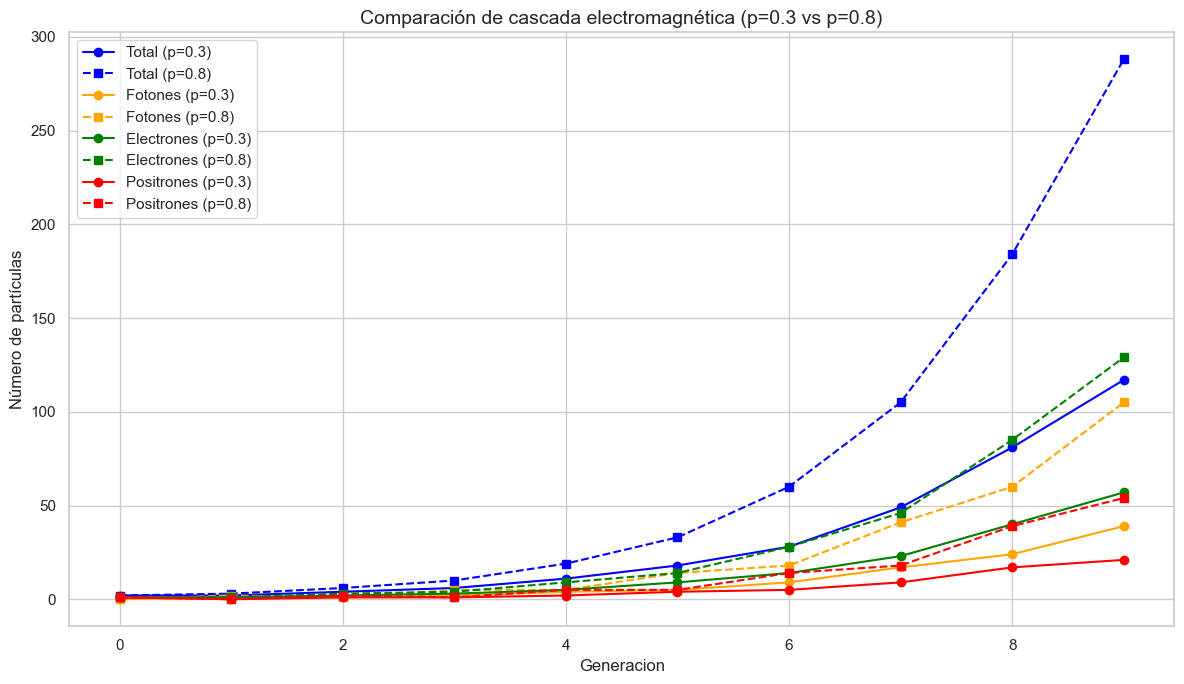

In [79]:
import random
import math
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Constantes
ELECTRON_MASS = 0.511  # MeV
MAX_GENERATIONS = 10

# Estilo de gr√°ficos
sns.set(style="whitegrid")

# Clase de part√≠cula
class Particle:
    def __init__(self, type, energy):
        self.type = type
        self.energy = energy

    def __repr__(self):
        return f"{self.type.capitalize()}({self.energy:.2f} MeV)"

# Divisi√≥n aleatoria de energ√≠a
def random_split(energy):
    frac = random.uniform(0.3, 0.7)
    return (energy * frac, energy * (1 - frac))

# Simulaci√≥n de la cascada
def simulate_shower(initial_energy, threshold, annihilation_prob):
    generation = 0
    particles = [Particle('gamma', initial_energy)]
    counts_total = []
    counts_gamma = []
    counts_electron = []
    counts_positron = []

    while particles and generation < MAX_GENERATIONS:
        new_particles = []
        for p in particles:
            if p.energy < threshold:
                continue
            if p.type == 'gamma' and p.energy > 2 * ELECTRON_MASS:
                e_energy = random_split(p.energy)
                new_particles.append(Particle('electron', e_energy[0]))
                new_particles.append(Particle('positron', e_energy[1]))
            elif p.type == 'electron' and p.energy > threshold:
                gamma_energy = random_split(p.energy)[1]
                new_particles.append(Particle('gamma', gamma_energy))
                new_particles.append(Particle('electron', p.energy - gamma_energy))
            elif p.type == 'positron':
                if random.random() < annihilation_prob:
                    new_particles.append(Particle('gamma', p.energy))

        # Contar part√≠culas por tipo
        counts_total.append(len(new_particles))
        counts_gamma.append(sum(1 for p in new_particles if p.type == 'gamma'))
        counts_electron.append(sum(1 for p in new_particles if p.type == 'electron'))
        counts_positron.append(sum(1 for p in new_particles if p.type == 'positron'))

        particles = new_particles
        generation += 1

    return counts_total, counts_gamma, counts_electron, counts_positron

# Par√°metros de simulaci√≥n
initial_energy = 1000  # MeV
threshold = 1.0  # MeV

# Ejecutar simulaci√≥n con dos probabilidades distintas
counts_03 = simulate_shower(initial_energy, threshold, annihilation_prob=0.3)
counts_08 = simulate_shower(initial_energy, threshold, annihilation_prob=0.8)

# ====== Gr√°ficas comparativas ======
gens = range(len(counts_03[0]))

plt.figure(figsize=(12, 7))

# Total
plt.plot(gens, counts_03[0], marker='o', linestyle='-', color='blue', label="Total (p=0.3)")
plt.plot(gens, counts_08[0], marker='s', linestyle='--', color='blue', label="Total (p=0.8)")

# Fotones
plt.plot(gens, counts_03[1], marker='o', linestyle='-', color='orange', label="Fotones (p=0.3)")
plt.plot(gens, counts_08[1], marker='s', linestyle='--', color='orange', label="Fotones (p=0.8)")

# Electrones
plt.plot(gens, counts_03[2], marker='o', linestyle='-', color='green', label="Electrones (p=0.3)")
plt.plot(gens, counts_08[2], marker='s', linestyle='--', color='green', label="Electrones (p=0.8)")

# Positrones
plt.plot(gens, counts_03[3], marker='o', linestyle='-', color='red', label="Positrones (p=0.3)")
plt.plot(gens, counts_08[3], marker='s', linestyle='--', color='red', label="Positrones (p=0.8)")

plt.xlabel("Generacion", fontsize=12)
plt.ylabel("N√∫mero de part√≠culas", fontsize=12)
plt.title("Comparaci√≥n de cascada electromagn√©tica (p=0.3 vs p=0.8)", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("/mnt/data/shower_comparison.png")

print("‚úÖ Comparaci√≥n completada. Gr√°fica combinada generada: shower_comparison.png")


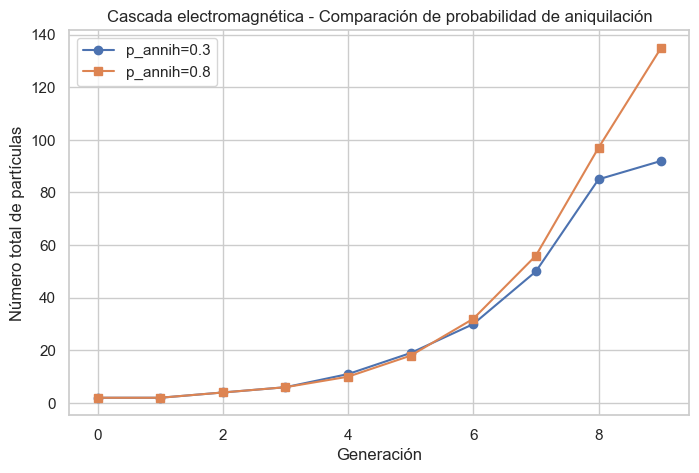

In [80]:
# Leer los dos archivos con encoding compatible
df_03 = pd.read_csv("shower_data03.csv", encoding="latin-1")
df_08 = pd.read_csv("shower_data08.csv", encoding="latin-1")

# Agrupar por generaci√≥n ‚Üí n√∫mero total de part√≠culas
count_03 = df_03.groupby("Generacion").size().reset_index(name="N_particulas")
count_08 = df_08.groupby("Generacion").size().reset_index(name="N_particulas")

# Gr√°fico comparativo
plt.figure(figsize=(8,5))
plt.plot(count_03["Generacion"], count_03["N_particulas"], marker='o', label="p_annih=0.3")
plt.plot(count_08["Generacion"], count_08["N_particulas"], marker='s', label="p_annih=0.8")
plt.xlabel("Generaci√≥n")
plt.ylabel("N√∫mero total de part√≠culas")
plt.title("Cascada electromagn√©tica - Comparaci√≥n de probabilidad de aniquilaci√≥n")
plt.legend()
plt.grid(True)
plt.show()


# Comparaci√≥n de resultados (Monte Carlo, cascada electromagn√©tica)

## Crecimiento total de part√≠culas
- **p = 0.3**: el n√∫mero total de part√≠culas crece de forma exponencial, pero m√°s moderada.  
- **p = 0.8**: el crecimiento es mucho m√°s r√°pido, superando las 280 part√≠culas en la generaci√≥n 9, casi el doble que en el caso \(p=0.3\).  

Esto muestra que la probabilidad de aniquilaci√≥n de positrones tiene un efecto fuerte en la multiplicaci√≥n global de la cascada.

---

## Fotones
- **p = 0.3**: los fotones crecen, pero en menor n√∫mero.  
- **p = 0.8**: se observa una mayor producci√≥n de fotones en todas las generaciones.  

Al aumentar la aniquilaci√≥n de positrones, se generan m√°s fotones de aniquilaci√≥n, retroalimentando la cascada.

---

## Electrones
- Ambos casos muestran crecimiento exponencial.  
- Con \(p=0.8\), la cantidad de electrones es mayor.  

El exceso de fotones secundarios aumenta la probabilidad de creaci√≥n de pares electr√≥n-positr√≥n, generando m√°s electrones.

---

## Positrones
- **p = 0.3**: sobreviven m√°s positrones, porque la probabilidad de aniquilaci√≥n es baja.  
- **p = 0.8**: la poblaci√≥n de positrones es menor, porque la mayor√≠a se aniquila r√°pidamente.  

Con alta probabilidad de aniquilaci√≥n, casi todos los positrones desaparecen en cada generaci√≥n.



La cascada electromagn√©tica depende de tres procesos b√°sicos:

 **Producci√≥n de pares**  
   
   $\gamma \;\to\; e^+ + e^-$
   

**Bremsstrahlung**  
   $e^\pm \;\to\; e^\pm + \gamma$

 **Aniquilaci√≥n de positrones**  
   $e^+ + e^- \;\to\; 2\gamma$

### Caso \(p=0.8\) (alta probabilidad de aniquilaci√≥n)
- Los positrones no se acumulan en generaciones posteriores.  
- Cada aniquilaci√≥n produce fotones adicionales.  
- Los nuevos fotones aceleran la multiplicaci√≥n de electrones y part√≠culas totales.  
- Resultado: cascada **m√°s intensa y dominada por fotones y electrones**.  

### Caso \(p=0.3\) (baja probabilidad de aniquilaci√≥n)
- Los positrones sobreviven m√°s tiempo.  
- Se generan menos fotones de aniquilaci√≥n.  
- El crecimiento de la cascada es m√°s lento y equilibrado entre especies. 

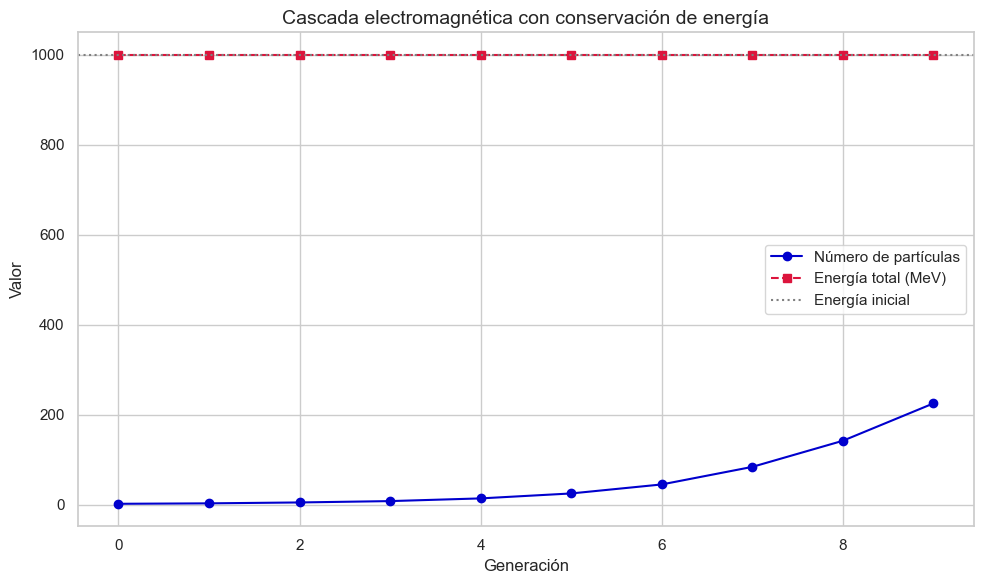

In [ ]:

# Constantes
ELECTRON_MASS = 0.511  # MeV
MAX_GENERATIONS = 10
ANNIHILATION_PROB = 0.3

sns.set(style="whitegrid")

class Particle:
    def __init__(self, type, energy):
        self.type = type
        self.energy = energy

# Divisi√≥n aleatoria de energ√≠a (conservando la suma)
def random_split(energy):
    frac = random.uniform(0.3, 0.7)
    return (energy * frac, energy * (1 - frac))

# Calcular energ√≠a total
def total_energy(particles):
    return sum(p.energy for p in particles)

def simulate_shower(initial_energy, threshold):
    generation = 0
    particles = [Particle('gamma', initial_energy)]
    all_data = []
    generation_counts = []
    generation_energies = []

    while particles and generation < MAX_GENERATIONS:
        new_particles = []

        for p in particles:
            if p.energy < threshold:
                # En vez de perderla, la guardamos como part√≠cula "muerta"
                new_particles.append(Particle(p.type, p.energy))
                continue

            if p.type == 'gamma' and p.energy > 2 * ELECTRON_MASS:
                e1, e2 = random_split(p.energy)
                new_particles.append(Particle('electron', e1))
                new_particles.append(Particle('positron', e2))

            elif p.type == 'electron':
                g, e = random_split(p.energy)
                new_particles.append(Particle('gamma', g))
                new_particles.append(Particle('electron', e))

            elif p.type == 'positron':
                if random.random() < ANNIHILATION_PROB:
                    # Se convierte en 2 gammas que suman su energ√≠a
                    g1, g2 = random_split(p.energy)
                    new_particles.append(Particle('gamma', g1))
                    new_particles.append(Particle('gamma', g2))
                else:
                    # Si no se aniquila, se mantiene
                    new_particles.append(Particle('positron', p.energy))

        # Guardar datos de la generaci√≥n
        generation_data = [(generation, p.type, p.energy) for p in new_particles]
        all_data.extend(generation_data)
        generation_counts.append(len(new_particles))
        generation_energies.append(total_energy(new_particles))

        particles = new_particles
        generation += 1

    return all_data, generation_counts, generation_energies

# Par√°metros
initial_energy = 1000  # MeV
threshold = 1.0        # MeV



# Ejecutar
data, counts, energies = simulate_shower(initial_energy, threshold)

# Exportar
output_csv_path = "/mnt/data/shower_data_conservada.csv"
os.makedirs(os.path.dirname(output_csv_path), exist_ok=True)
with open(output_csv_path, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Generacion", "Tipo", "Energia (MeV)"])
    writer.writerows(data)

# === Gr√°fica ===
plt.figure(figsize=(10, 6))
plt.plot(range(len(counts)), counts, marker='o', linestyle='-', color='mediumblue', label="N√∫mero de part√≠culas")
plt.plot(range(len(energies)), energies, marker='s', linestyle='--', color='crimson', label="Energ√≠a total (MeV)")
plt.axhline(y=initial_energy, color='gray', linestyle=':', label="Energ√≠a inicial")
plt.xlabel("Generaci√≥n", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.title("Cascada electromagn√©tica con conservaci√≥n de energ√≠a", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Conclusiones de la simulaci√≥n de cascada electromagn√©tica

- La **energ√≠a total se conserva**: en todas las generaciones, la suma de las energ√≠as de las part√≠culas se mantiene cercana a los 1000 MeV iniciales.
- El **n√∫mero de part√≠culas aumenta** con la generaci√≥n, lo cual refleja el car√°cter multiplicativo de la cascada.
- La **energ√≠a media por part√≠cula disminuye**: aunque la energ√≠a total es constante, cada part√≠cula termina con menos energ√≠a conforme avanzan las generaciones.
- El **umbral de energ√≠a (`threshold`)** controla cu√°ndo una part√≠cula deja de participar en la cascada; valores m√°s bajos permiten m√°s generaciones antes de detenerse.
- El modelo actual es **simplificado**: no incluye p√©rdidas f√≠sicas reales (ionizaci√≥n, radiaci√≥n continua, fotones de 511 keV en aniquilaci√≥n, etc.), por lo que es ideal para explorar conservaci√≥n pero no representa toda la f√≠sica real.


Desviaci√≥n m√°xima absoluta de energ√≠a (MeV): 2.2737367544323206e-13


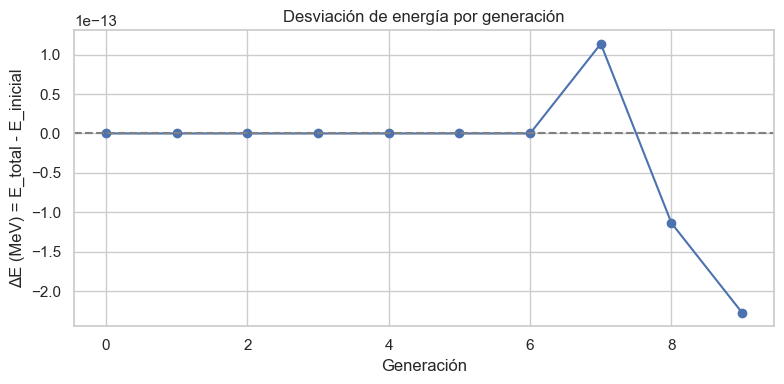

In [82]:
# despu√©s de ejecutar la simulaci√≥n y tener 'energies' y 'initial_energy'
dE = [E - initial_energy for E in energies]
max_abs_dev = max(abs(x) for x in dE)
print("Desviaci√≥n m√°xima absoluta de energ√≠a (MeV):", max_abs_dev)

# graficar ŒîE
plt.figure(figsize=(8,4))
plt.plot(range(len(dE)), dE, marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Generaci√≥n")
plt.ylabel("ŒîE (MeV) = E_total - E_inicial")
plt.title("Desviaci√≥n de energ√≠a por generaci√≥n")
plt.grid(True)
plt.tight_layout()
plt.show()


## Conclusi√≥n sobre la conservaci√≥n de la energ√≠a

En la simulaci√≥n de cascadas electromagn√©ticas se observa que la energ√≠a total por
generaci√≥n se mantiene pr√°cticamente constante. La desviaci√≥n m√°xima absoluta 
encontrada fue del orden de:

$$
\Delta E_{\text{m√°x}} \approx 2.27 \times 10^{-13} \, \text{MeV}
$$

Si se compara con la energ√≠a inicial de 1000 MeV, esta diferencia relativa es del orden de:

$$
\frac{\Delta E_{\text{m√°x}}}{E_{\text{inicial}}} \sim 10^{-16}
$$

lo cual es despreciable. 

Esto significa que **la energ√≠a se conserva en el modelo implementado**. Las peque√±as 
fluctuaciones observadas provienen de los **errores de redondeo num√©rico** propios 
de la aritm√©tica de punto flotante en los computadores, y no de una p√©rdida real 
de energ√≠a f√≠sica en la cascada.



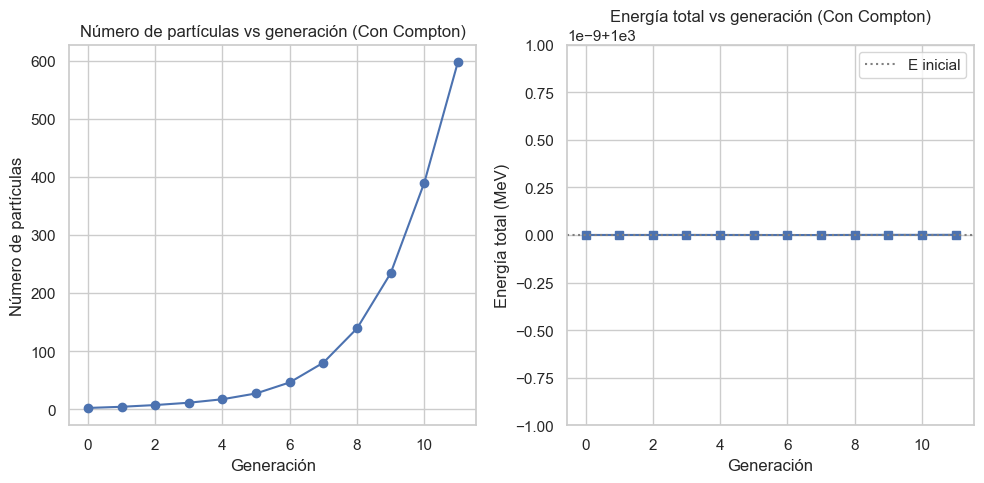

Desviaci√≥n m√°xima absoluta de energ√≠a (MeV): 7.958078640513122e-13


In [84]:
import random
import math
import csv
import os
import matplotlib.pyplot as plt

# -----------------------
# Par√°metros y constantes
# -----------------------
ELECTRON_MASS = 0.511  # MeV (m_e c^2)
MAX_GENERATIONS = 12
ANNIHILATION_PROB = 0.3

# Probabilidad de hacer pair production vs Compton cuando E_gamma > 2 m_e
# (aj√∫stala seg√∫n lo que quieras modelar; 0.5 es una elecci√≥n arbitraria)
PAIR_PROB_ABOVE_THRESHOLD = 0.5

# -----------------------
# Clase de part√≠cula
# -----------------------
class Particle:
    def __init__(self, typ, energy):
        self.type = typ  # 'gamma', 'electron', 'positron'
        self.energy = float(energy)

# -----------------------
# Splitting simple (conserva suma)
# -----------------------
def random_split(energy, frac_min=0.3, frac_max=0.7):
    frac = random.uniform(frac_min, frac_max)
    return (energy * frac, energy * (1 - frac))

# -----------------------
# Klein-Nishina: pdf (no incluye constantes multiplicativas)
# -----------------------
def klein_nishina_pdf(cos_theta, E):
    """
    Devuelve un valor proporcional a la densidad angular Klein-Nishina
    para un fot√≥n de energ√≠a E (MeV). cos_theta en [-1, 1].
    F√≥rmula simplificada (proporcional):
      dœÉ/dŒ© ‚àù (E'/E)^2 * (E'/E + E/E' - sin^2 Œ∏)
    con E' = E / (1 + alpha * (1 - cosŒ∏)), alpha = E / m_e
    """
    alpha = E / ELECTRON_MASS
    one_minus_cos = 1.0 - cos_theta
    denom = 1.0 + alpha * one_minus_cos
    if denom <= 0:
        return 0.0
    Eprime_over_E = 1.0 / denom
    Eprime_over_E_sq = Eprime_over_E * Eprime_over_E
    sin2 = 1.0 - cos_theta * cos_theta
    val = Eprime_over_E_sq * (Eprime_over_E + 1.0 / Eprime_over_E - sin2)
    # Evitar valores negativos num√©ricos
    return max(val, 0.0)

# -----------------------
# Muestreo por rechazo de Klein-Nishina
# -----------------------
def sample_compton_cos_theta(E, n_grid_max=1000):
    """
    Muestreo por rechazo de cos(theta) en [-1,1] usando la pdf de KN.
    Calcula num√©ricamente un m√°ximo aproximado de la pdf en una rejilla y
    usa ese m√°ximo como constante de envelope.
    """
    # Rejilla para encontrar m√°ximo aproximado (r√°pido)
    xs = [ -1.0 + 2.0 * i / (n_grid_max - 1) for i in range(n_grid_max) ]
    vals = [ klein_nishina_pdf(x, E) for x in xs ]
    max_pdf = max(vals) if vals else 1.0

    # Rejection sampling
    while True:
        cos_theta = random.uniform(-1.0, 1.0)
        u = random.random() * max_pdf
        if klein_nishina_pdf(cos_theta, E) >= u:
            return cos_theta

# -----------------------
# Efecto Compton: energ√≠a fot√≥n dispersado y energ√≠a recoiling electron
# -----------------------
def compton_scatter(E):
    """
    Devuelve (E_scattered_gamma, E_recoil_electron).
    Basado en la f√≥rmula:
      E' = E / (1 + (E/m_e)*(1 - cosŒ∏))
    donde E y E' en MeV.
    """
    cos_theta = sample_compton_cos_theta(E)
    alpha = E / ELECTRON_MASS
    denom = 1.0 + alpha * (1.0 - cos_theta)
    E_prime = E / denom
    E_recoil = E - E_prime
    # Por seguridad, evitar valores negativos por errores num√©ricos
    if E_prime < 0: E_prime = 0.0
    if E_recoil < 0: E_recoil = 0.0
    return E_prime, E_recoil, cos_theta

# -----------------------
# Total energy helper
# -----------------------
def total_energy(particles):
    return sum(p.energy for p in particles)

# -----------------------
# Simulaci√≥n con Compton a√±adido
# -----------------------
def simulate_shower_with_compton(initial_energy, threshold):
    generation = 0
    particles = [Particle('gamma', initial_energy)]
    all_data = []
    generation_counts = []
    generation_energies = []

    while particles and generation < MAX_GENERATIONS:
        new_particles = []

        for p in particles:
            # Si por debajo del threshold, lo dejamos "inactivo" pero contabilizado
            if p.energy < threshold:
                new_particles.append(Particle(p.type, p.energy))
                continue

            if p.type == 'gamma':
                # Decide pair production vs compton si la energ√≠a permite pair
                if p.energy > 2.0 * ELECTRON_MASS and random.random() < PAIR_PROB_ABOVE_THRESHOLD:
                    # pair production (conserva suma)
                    e1, e2 = random_split(p.energy)
                    new_particles.append(Particle('electron', e1))
                    new_particles.append(Particle('positron', e2))
                else:
                    # Compton scattering: fot√≥n dispersado + electr√≥n recoil
                    E_gamma_scattered, E_recoil, cos_theta = compton_scatter(p.energy)
                    # Mantener fot√≥n dispersado (si tiene energ√≠a significativa)
                    if E_gamma_scattered > 0:
                        new_particles.append(Particle('gamma', E_gamma_scattered))
                    # A√±adir electr√≥n recoil (puede ser bajo)
                    if E_recoil > 0:
                        new_particles.append(Particle('electron', E_recoil))
            elif p.type == 'electron':
                # Emisi√≥n sencilla de fot√≥n (brems-like toy model)
                g, e = random_split(p.energy)
                new_particles.append(Particle('gamma', g))
                new_particles.append(Particle('electron', e))
            elif p.type == 'positron':
                # Aniquilaci√≥n probabil√≠stica (como antes)
                if random.random() < ANNIHILATION_PROB:
                    # convertimos energ√≠a de positr√≥n en dos gammas (como toy model)
                    g1, g2 = random_split(p.energy)
                    new_particles.append(Particle('gamma', g1))
                    new_particles.append(Particle('gamma', g2))
                else:
                    new_particles.append(Particle('positron', p.energy))

        # Guardar datos
        generation_data = [(generation, p.type, p.energy) for p in new_particles]
        all_data.extend(generation_data)
        generation_counts.append(len(new_particles))
        generation_energies.append(total_energy(new_particles))

        particles = new_particles
        generation += 1

    return all_data, generation_counts, generation_energies

# -----------------------
# Ejecuci√≥n de ejemplo
# -----------------------
if __name__ == "__main__":
    initial_energy = 1000.0  # MeV
    threshold = 1.0          # MeV

    data, counts, energies = simulate_shower_with_compton(initial_energy, threshold)

    # Guardar datos
    output_csv_path = "shower_data_with_compton.csv"
    with open(output_csv_path, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["Generaci√≥n", "Tipo", "Energ√≠a (MeV)"])
        writer.writerows(data)

    # Plots comparativos
    gens = list(range(len(counts)))
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(gens, counts, marker='o')
    plt.xlabel("Generaci√≥n"); plt.ylabel("N√∫mero de part√≠culas")
    plt.title("N√∫mero de part√≠culas vs generaci√≥n (Con Compton)")
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.plot(gens, energies, marker='s')
    plt.axhline(y=initial_energy, color='gray', linestyle=':', label='E inicial')
    plt.xlabel("Generaci√≥n"); plt.ylabel("Energ√≠a total (MeV)")
    plt.title("Energ√≠a total vs generaci√≥n (Con Compton)")
    plt.legend(); plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Comprobaci√≥n de conservaci√≥n
    dE = [E - initial_energy for E in energies]
    max_abs_dev = max(abs(x) for x in dE)
    print("Desviaci√≥n m√°xima absoluta de energ√≠a (MeV):", max_abs_dev)


### An√°lisis de resultados con el efecto Compton

La inclusi√≥n del **efecto Compton** en la simulaci√≥n Monte Carlo de cascadas electromagn√©ticas introduce un incremento notable en el **n√∫mero de part√≠culas por generaci√≥n**, ya que los fotones pueden transferir parte de su energ√≠a a electrones, los cuales a su vez alimentan el desarrollo de la cascada. Esto se observa en la gr√°fica de multiplicidad, donde el crecimiento es m√°s acelerado que en el modelo con solo *Bethe‚ÄìHeitler*.  

El efecto Compton se describe mediante la relaci√≥n de dispersi√≥n:

$$
\lambda' - \lambda = \frac{h}{m_e c} (1 - \cos\theta),
$$

donde $\lambda$ es la longitud de onda inicial del fot√≥n, $$\lambda$$ la longitud de onda dispersada, $$h$$ la constante de Planck, $$m_e$$ la masa del electr√≥n y $\theta$ el √°ngulo de dispersi√≥n. Esta expresi√≥n muestra c√≥mo el fot√≥n pierde energ√≠a al interactuar con un electr√≥n, generando part√≠culas adicionales en la cascada.

A pesar de este incremento en la **multiplicidad de part√≠culas**, la **energ√≠a total del sistema se conserva** de manera excelente: la curva se mantiene pr√°cticamente plana alrededor de la energ√≠a inicial, con desviaciones del orden de 

$$
10^{-13} \, \text{MeV},
$$

que corresponden √∫nicamente a errores num√©ricos de redondeo.  

En conclusi√≥n, la incorporaci√≥n del proceso Compton no viola la conservaci√≥n de la energ√≠a, sino que **redistribuye la misma entre un n√∫mero mayor de part√≠culas**, enriqueciendo el desarrollo de la cascada.
